## Detección de bordes:
Esto es algo muy común. Cuando hablamos de "detección de bordes", nos referimos a detectar discontinuidades en el nivel de intensidad de la imagen. 

Para realizar este tipo de detección, existen diferentes tipos de filtros, a continuación implementaremos algunos de estos filtros utilizando scikit-imagee y matplotlib:

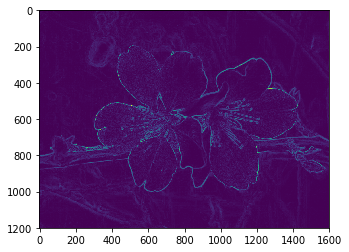

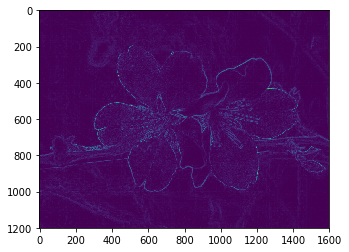

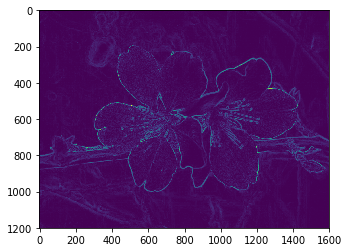

In [15]:
# Librerias necesarias
from skimage import io
from skimage import filters
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

# Abrimos la imagen
imagen = io.imread("imagen.jpg")
imagen_g = rgb2gray(imagen)

# Filtros: sobel, roberts, prewitt
filtros = [filters.sobel, filters.roberts, filters.prewitt]

for filtro in filtros:
    # Aplicamos cada uno de los filtros
    img_fil = filtro(imagen_g)
    
    # Mostramos los resultados 
    plt.imshow(img_fil)
    plt.show()



## Mejoramiento del contraste:
En algunas ocasiones se necesita aumentar el contraste de las imágenes. Al aumentar el contraste incrementa el cambio en la intensidad de la luz entre las zonas más oscuras o más claras.

Scikit-Image nos proporciona diversas funciones para el mejoramiento de contraste:

C:\Users\PILAR\AppData\Local\Programs\Python\Python36-32\lib\site-packages\skimage\exposure\exposure.py:63: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  warn("This might be a color image. The histogram will be "
C:\Users\PILAR\AppData\Local\Programs\Python\Python36-32\lib\site-packages\skimage\util\dtype.py:130: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


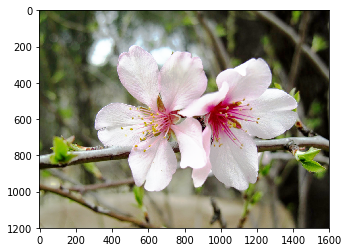

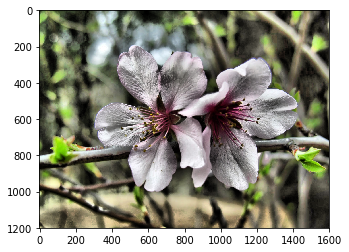

In [19]:
from skimage import exposure
from skimage import io
import numpy as np
import matplotlib.pyplot as plt

imagen = io.imread("imagen.jpg")

# Estiramiento de contraste
p2, p98 = np.percentile(imagen, (2,98))
img_rescale = exposure.rescale_intensity(imagen, in_range=(p2,p98))

# Ecualización
img_eq = exposure.equalize_hist(imagen)

# Ecualización adaptiva
img_adapteq = exposure.equalize_adapthist(imagen, clip_limit=0.03)

for eq in (img_eq, img_adapteq):
    plt.imshow(eq)
    plt.show()

## Eliminación de ruido:
Existen diferentes tipos de ruidos que pueden reducir la calidad de la imagen. Uno de los más comunes es el ruido conocido como sal y pimienta, el cual es producido por perturbaciones agudas y repentinas en la imagen causadas por el mismo equipo de medición o el ambiente.

Para minimizar el ruido, podemos utilizar el filtro de medianas:

C:\Users\PILAR\AppData\Local\Programs\Python\Python36-32\lib\site-packages\skimage\util\dtype.py:130: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


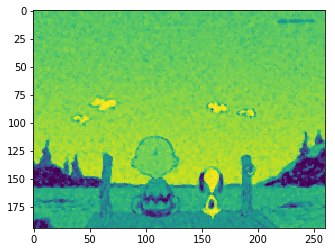

In [35]:
from skimage import io
from skimage.filters.rank import median
from skimage.morphology import disk
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

imagen = io.imread("charlie.jpg")
img_gray = rgb2gray(imagen)

med = median(img_gray)

plt.imshow(med)
plt.show()

## Restauración:
Al restaurar una imagen se busca normalmente eliminar el ruido, mejorar el brillo, el color y los detalles de la misma, recuperando de esta forma aquellas partes que han sido deterioradas

Para la restauración, utilizaremos el filtro Wiener:

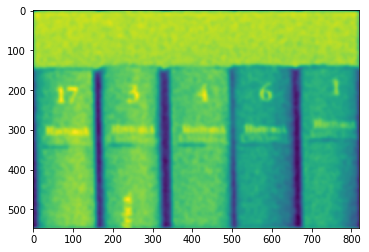

In [27]:
from skimage import restoration
from scipy.signal import convolve2d
from skimage import io
from skimage.color import rgb2gray
import numpy as np
import matplotlib.pyplot as plt

imagen = io.imread("imagen_ruido.jpg")

img = rgb2gray(imagen)

psf = np.ones((5,5)) / 25

img = convolve2d(img, psf, 'same')
img += 0.1 * img.std() * np.random.standard_normal((img.shape))
deconvolved_img = restoration.wiener(img, psf, 100)

plt.imshow(deconvolved_img)
plt.show()

## Suavizar y resaltar contornos:

En algunos casos no basta con detectar los bordes en la imagen, sino que se necesita detectarlos y suavizarlos. Para esto se utiliza el filtro Canny, el cual se compone de tres etapas: la primera dirigida a la reducción del ruido, obteniendo una imagen suavizada y la segunda donde se encuentra los gradientes en la intensidad de los píxeles.

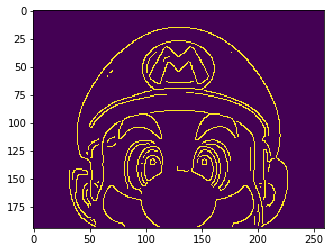

In [38]:
from skimage import io
from skimage import feature
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

imagen = io.imread("mario.jpg")
img = rgb2gray(imagen)
edge = feature.canny(img)
plt.imshow(edge)
plt.show()